In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# This code performs a full analysis of the Netflix content data, including descriptive statistics and checking for missing values.


# Load the data from the Excel file
file_path = "C:\\Users\\Hp\\Desktop\\netflix_content_2023_excel.xlsx"
df = pd.read_excel(file_path, sheet_name='netflix_content_2023')
df

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show
2,The Glory: Season 1 // ë” ê¸€ë¡œë¦¬: ì‹œì¦Œ 1,Yes,2022-12-30,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"50,30,00,000",English,Movie
...,...,...,...,...,...,...
24807,We Are Black and British: Season 1,No,NaT,"1,00,000",English,Show
24808,Whitney Cummings: Can I Touch It?,Yes,2019-07-30,"1,00,000",English,Movie
24809,Whitney Cummings: Jokes,No,2022-07-26,"1,00,000",English,Movie
24810,"Whose Vote Counts, Explained: Limited Series",Yes,2020-09-28,"1,00,000",English,Movie


In [3]:
# Display basic information about the dataframe
info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Title                24812 non-null  object        
 1   Available Globally?  24812 non-null  object        
 2   Release Date         8166 non-null   datetime64[ns]
 3   Hours Viewed         24812 non-null  object        
 4   Language Indicator   24812 non-null  object        
 5   Content Type         24812 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 1.1+ MB


In [4]:
# Get descriptive statistics for numerical columns
describe = df.describe(include='all')

In [5]:
# Check for missing values
missing_values = df.isnull().sum()

In [6]:
# Combine the results into a single output
analysis_results = {'info': info, 'describe': describe, 'missing_values': missing_values}

# Display the results
print(analysis_results['info'])
print(analysis_results['describe'])
print(analysis_results['missing_values'])

None
                            Title Available Globally?  \
count                       24812               24812   
unique                      19158                   2   
top     The Night Agent: Season 1                  No   
freq                            2               17162   
mean                          NaN                 NaN   
min                           NaN                 NaN   
25%                           NaN                 NaN   
50%                           NaN                 NaN   
75%                           NaN                 NaN   
max                           NaN                 NaN   

                         Release Date Hours Viewed Language Indicator  \
count                            8166        24812              24812   
unique                            NaN          889                  6   
top                               NaN     1,00,000            English   
freq                              NaN         4046              17268   
me

C:\Users\Hp\AppData\Local\Temp\ipykernel_2416\2230546708.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=content_type_counts.index, y=content_type_counts.values, palette='viridis')


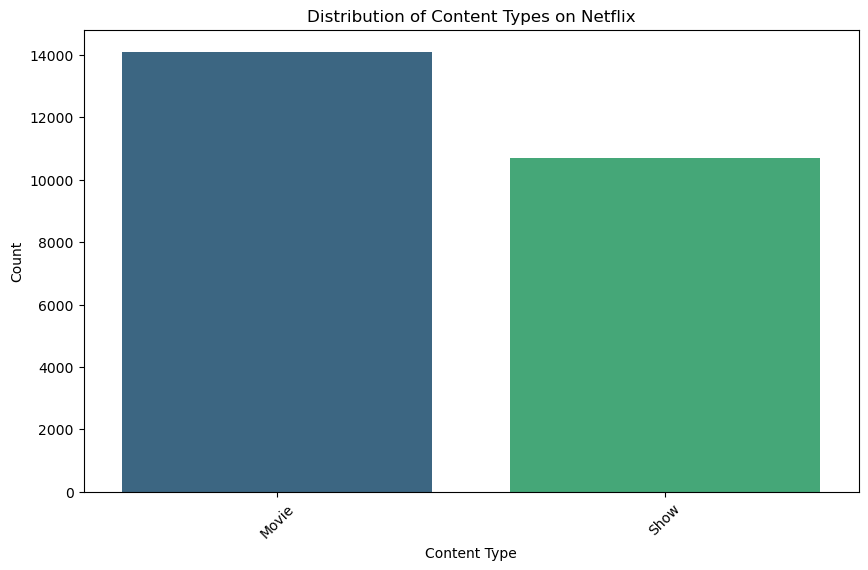

In [7]:
# Count the number of each content type
content_type_counts = df['Content Type'].value_counts()

# Plot the distribution of content types
plt.figure(figsize=(10, 6))
sns.barplot(x=content_type_counts.index, y=content_type_counts.values, palette='viridis')
plt.title('Distribution of Content Types on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_2416\203505.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Content Type', y='Hours Viewed', data=hours_viewed_by_type, palette='magma')


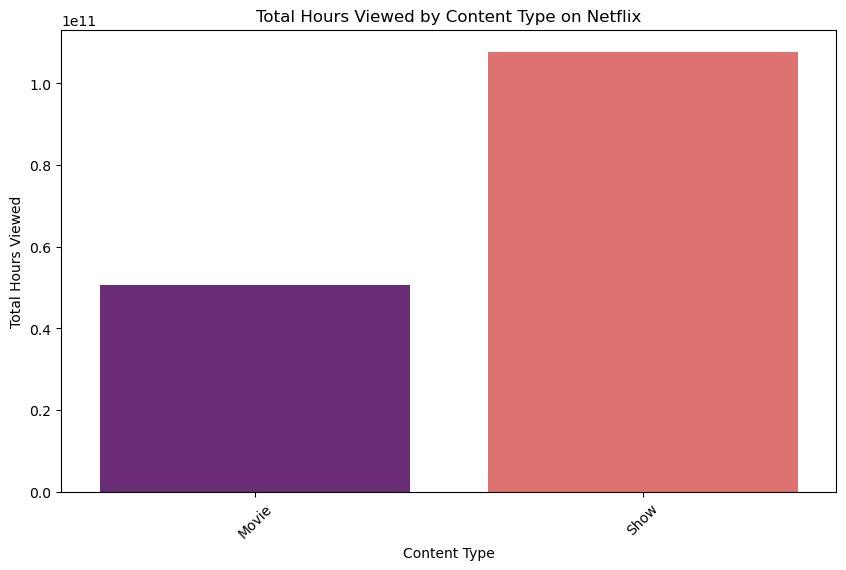

In [8]:
# Convert 'Hours Viewed' to numeric and handle commas
# Remove commas and convert to numeric
df['Hours Viewed'] = df['Hours Viewed'].str.replace(',', '').astype(float)

# Group by content type and sum the hours viewed
hours_viewed_by_type = df.groupby('Content Type')['Hours Viewed'].sum().reset_index()

# Plot the total hours viewed by content type
plt.figure(figsize=(10, 6))
sns.barplot(x='Content Type', y='Hours Viewed', data=hours_viewed_by_type, palette='magma')
plt.title('Total Hours Viewed by Content Type on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Total Hours Viewed')
plt.xticks(rotation=45)
plt.show()

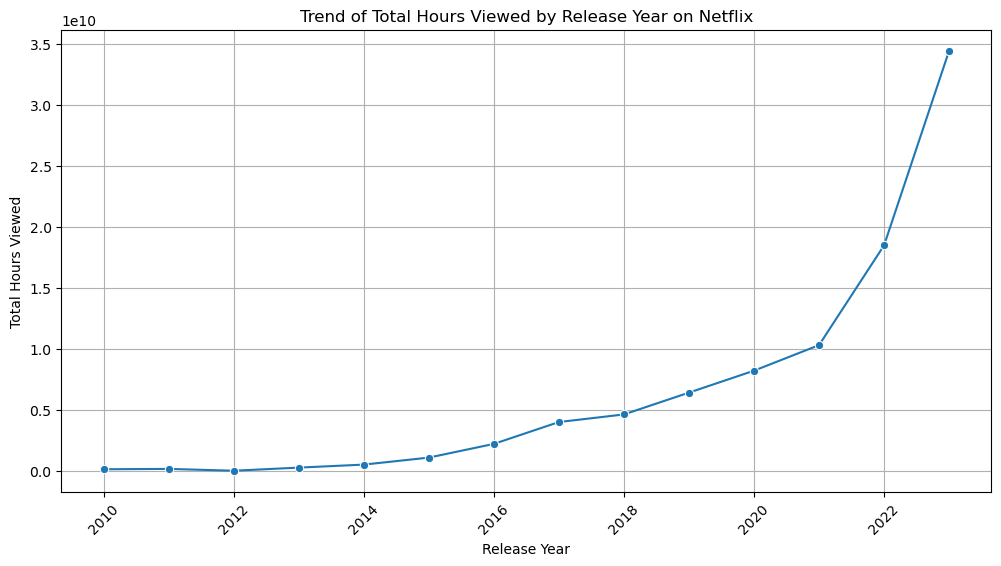

In [9]:
# Convert 'Release Date' to datetime format

df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')

# Extract year from the release date

df['Release Year'] = df['Release Date'].dt.year

# Group by release year and sum the hours viewed

hours_viewed_by_year = df.groupby('Release Year')['Hours Viewed'].sum().reset_index()

# Plot the trend of hours viewed over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Release Year', y='Hours Viewed', data=hours_viewed_by_year, marker='o')
plt.title('Trend of Total Hours Viewed by Release Year on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Total Hours Viewed')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [10]:
# This code summarizes the findings from the analysis of the Netflix content data.

# Summary of findings
summary = {
    'Total Titles': df['Title'].nunique(),
    'Total Hours Viewed': df['Hours Viewed'].sum(),
    'Most Common Content Type': df['Content Type'].mode()[0],
    'Most Viewed Content Type': hours_viewed_by_type.loc[hours_viewed_by_type['Hours Viewed'].idxmax(), 'Content Type'],
    'Year with Highest Viewing': hours_viewed_by_year.loc[hours_viewed_by_year['Hours Viewed'].idxmax(), 'Release Year'],
    'Highest Hours Viewed': hours_viewed_by_year['Hours Viewed'].max()
}

# Display the summary
summary

{'Total Titles': 19158,
 'Total Hours Viewed': 158401900000.0,
 'Most Common Content Type': 'Movie',
 'Most Viewed Content Type': 'Show',
 'Year with Highest Viewing': 2023.0,
 'Highest Hours Viewed': 34445900000.0}